In [64]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
from pprint import pprint
import pandas as pd

In [65]:
# create engine to sqlite data
engine = create_engine("sqlite:///abnb.sqlite")

In [66]:
engine.execute('SELECT * FROM bnb_dset LIMIT 2').fetchall()

[(0, 2441, 'Cozy Artist’s Abode, NE Mpls - Pets, Wifi, Roku TV', 2680, 1, 2, 'Hennepin', 45.00862, -93.23424, 'Entire home', 'Entire home/apt', 5, 10.0, 1.0, '["Hot water", "Keypad", "Long term stays allowed", "Wifi", "Dedicated workspace", "Hangers", "First aid kit", "Free parking on premises", "Refrigerat ... (411 characters truncated) ... ard \\u2013 Fully fenced", "Oven", "Self check-in", "Bathtub", "Luggage dropoff allowed", "Hair dryer", "Fire extinguisher", "Carbon monoxide alarm"]', 91.0, 1, 24, 24, 24, 24, 298, 4.8, 4.72, 4.93, 4.93, 4.8, 4.71),
 (4697, 4534, 'Charming, 1 or 2BR + private bath, near downtown', 5811, 1, 2, 'Hennepin', 44.94566, -93.35721, 'Private room in home', 'Private room', 5, 10.0, 2.0, '["Hot water", "Host greets you", "Dining table", "Bed linens", "Dishwasher", "Wifi", "Dedicated workspace", "Garden view", "Hangers", "First aid kit" ... (461 characters truncated) ...  "Room-darkening shades", "Outdoor dining area", "Kitchen", "Books and reading material"

In [67]:
# Inspect to look at columns
inspector= inspect(engine)
column_1= inspector.get_columns('bnb_dset')

for c in column_1:
    print(c['name'],c['type'])

index INTEGER
id INTEGER
name TEXT
host_id INTEGER
host_is_superhost INTEGER
host_total_listings_count INTEGER
county TEXT
latitude REAL
longitude REAL
property_type TEXT
room_type TEXT
accommodates INTEGER
bathrooms REAL
bedrooms REAL
amenities TEXT
price REAL
has_availability INTEGER
availability_30 INTEGER
availability_60 INTEGER
availability_90 INTEGER
availability_365 INTEGER
number_of_reviews INTEGER
review_scores_rating REAL
review_scores_cleanliness REAL
review_scores_checkin REAL
review_scores_communication REAL
review_scores_location REAL
review_scores_value REAL


In [68]:
# Reflect the existing databse in a new model
Base= automap_base()
Base.prepare(autoload_with=engine)
bar_info = Base.classes.bnb_dset

In [69]:
session = Session(engine)

In [70]:
# View all of the classes that automap found
Base.classes.keys()

['bnb_dset']

In [6]:
# Refrence to each table
data_set= Base.classes.bnb_dset


In [71]:
# Query for average price, review, and cleanliness score by county
# Sort the result by county

list_info = [bar_info.county,
       func.avg(bar_info.review_scores_rating), 
       func.avg(bar_info.price), 
       func.avg(bar_info.review_scores_cleanliness),
       func.avg(bar_info.review_scores_value)]
list_info_avg = session.query(*list_info).\
    group_by(bar_info.county).\
    order_by(bar_info.county).all()
list_info_avg

[('Anoka', 4.825102040816325, 184.7482993197279, 4.797959183673471, 4.789931972789116),
 ('Carver', 4.846607142857143, 301.0, 4.824285714285714, 4.753571428571428),
 ('Chisago', 4.815200000000001, 225.6, 4.823866666666667, 4.7350666666666665),
 ('Dakota', 4.783515151515153, 191.86060606060607, 4.763515151515151, 4.766424242424242),
 ('Hennepin', 4.817057623661388, 158.63284038755737, 4.812299847016822, 4.77089750127486),
 ('Isanti', 4.908695652173913, 228.1304347826087, 4.880434782608695, 4.84608695652174),
 ('Le Sueur', 4.873125, 286.9375, 4.92375, 4.799999999999999),
 ('Mille Lacs', 4.806619718309858, 280.8169014084507, 4.770281690140845, 4.739436619718311),
 ('Pierce', 4.908837209302327, 255.69767441860466, 4.909999999999999, 4.800697674418605),
 ('Ramsey', 4.806024423337856, 138.95251017639077, 4.785237449118046, 4.767584803256446),
 ('Scott', 4.717380952380952, 195.14285714285714, 4.695238095238096, 4.676666666666666),
 ('Sherburne', 4.7655737704918035, 140.55737704918033, 4.80032

In [72]:
df = pd.DataFrame(list_info_avg, columns=['county', 'review_scores_rating', 'price', 'review_scores_cleanliness','review_scores_value'])

In [73]:
df

,county,review_scores_rating,price,review_scores_cleanliness,review_scores_value
0,Anoka,4.825102,184.748299,4.797959,4.789932
1,Carver,4.846607,301.000000,4.824286,4.753571
2,Chisago,4.815200,225.600000,4.823867,4.735067
3,Dakota,4.783515,191.860606,4.763515,4.766424
4,Hennepin,4.817058,158.632840,4.812300,4.770898
5,Isanti,4.908696,228.130435,4.880435,4.846087
6,Le Sueur,4.873125,286.937500,4.923750,4.800000
7,Mille Lacs,4.806620,280.816901,4.770282,4.739437
8,Pierce,4.908837,255.697674,4.910000,4.800698
9,Ramsey,4.806024,138.952510,4.785237,4.767585


In [74]:
df['price'].describe()

count     16.000000
mean     219.523442
std       60.728407
min      132.750000
25%      178.219435
50%      212.851546
75%      280.851115
max      310.491228
Name: price, dtype: float64

In [75]:
df.describe()

,review_scores_rating,price,review_scores_cleanliness,review_scores_value
count,16.000000,16.000000,16.000000,16.000000
mean,4.836469,219.523442,4.830714,4.774793
std,0.062337,60.728407,0.071390,0.064507
min,4.717381,132.750000,4.695238,4.665738
25%,4.806471,178.219435,4.794779,4.745842
50%,4.821080,212.851546,4.818480,4.768178
75%,4.866451,280.851115,4.861944,4.800174
max,4.975000,310.491228,4.995000,4.940000


<AxesSubplot:xlabel='county'>

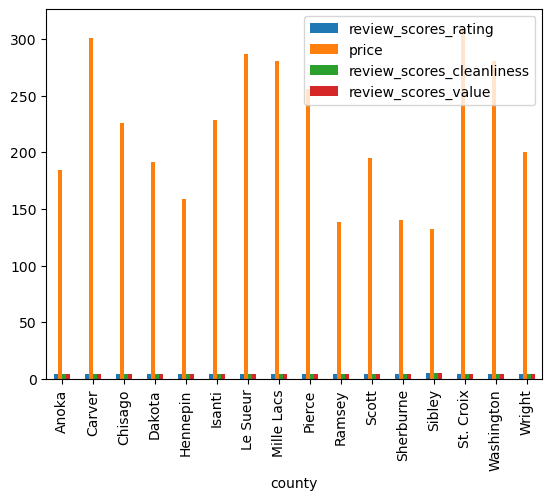

In [76]:
df.plot.bar(x='county')

<AxesSubplot:xlabel='review_scores_rating'>

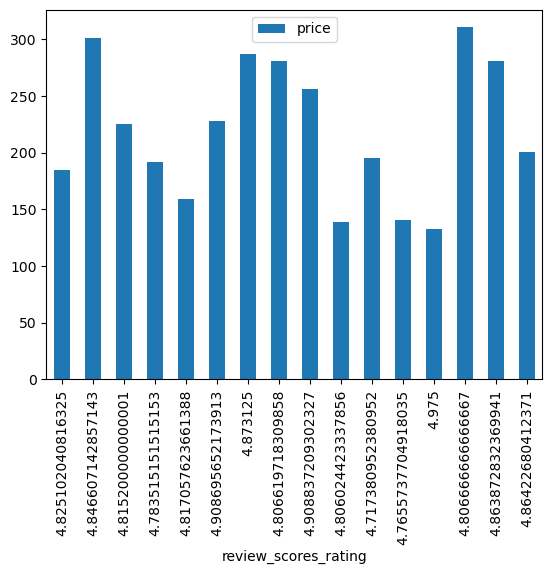

In [77]:
df.plot(kind='bar', x='review_scores_rating', y='price')

In [78]:
#  County, Price, Bedrooms, Review Scores_rating
session=Session(engine)
listing= data_set.host_total_listings_count
county= data_set.county
price= data_set.price
bedrooms= data_set.bedrooms
rs= data_set.review_scores_rating

sel= [listing,county,price,bedrooms,rs]
query_2= session.query(*sel).limit(10).all()

bar_g= []
for l,c,p,b,r in query_2:
    dict_2={}
    dict_2["listing"]= l
    dict_2["county"]=c
    dict_2["price"]=p
    dict_2["bedroom"]=b
    dict_2["review_score"]=r
    bar_g.append(dict_2)

In [79]:
bar_g

[{'listing': 2,
  'county': 'Hennepin',
  'price': 91.0,
  'bedroom': 1.0,
  'review_score': 4.8},
 {'listing': 2,
  'county': 'Hennepin',
  'price': 58.0,
  'bedroom': 2.0,
  'review_score': 4.88},
 {'listing': 2,
  'county': 'Hennepin',
  'price': 64.0,
  'bedroom': 2.0,
  'review_score': 4.78},
 {'listing': 2,
  'county': 'Hennepin',
  'price': 64.0,
  'bedroom': 2.0,
  'review_score': 4.96},
 {'listing': 23,
  'county': 'Hennepin',
  'price': 167.0,
  'bedroom': 5.0,
  'review_score': 4.93},
 {'listing': 1,
  'county': 'Hennepin',
  'price': 438.0,
  'bedroom': 5.0,
  'review_score': 5.0},
 {'listing': 2,
  'county': 'Hennepin',
  'price': 125.0,
  'bedroom': 1.0,
  'review_score': 4.93},
 {'listing': 4,
  'county': 'Ramsey',
  'price': 75.0,
  'bedroom': 1.0,
  'review_score': 4.9},
 {'listing': 1,
  'county': 'Hennepin',
  'price': 70.0,
  'bedroom': 1.0,
  'review_score': 4.78},
 {'listing': 4,
  'county': 'Ramsey',
  'price': 48.0,
  'bedroom': 1.0,
  'review_score': 4.87}]